In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd        
from math import sqrt
import networkx as nx

In [2]:
# https://cienciadedatos.net/documentos/pygml01-introduccion-grafos-redes-python
#https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html

In [ ]:
concr_data = pd.read_csv('C:/Users/evatr/Documents/Estancia/CONCR_test_FMH/output_4/all_disordered_segment_statistics.csv')
concr_data.head(20)

,image,threshold,grain_number,index,branch_distance,branch_type,connected_segments,mean_pixel_value,stdev_pixel_value,min_value,median_value,middle_value,basename
0,1,above,0,0,14.787240,1,"[1, 2]",0.600997,0.059646,0.479759,0.628742,0.643032,..\CONCR_test_FMH\stp_files
1,1,above,0,1,33.174373,2,"[0, 2, 5, 6]",0.531793,0.175295,0.209047,0.507949,0.244502,..\CONCR_test_FMH\stp_files
2,1,above,0,2,8.453958,2,"[0, 1, 3, 4]",0.437767,0.097775,0.323294,0.433644,0.332054,..\CONCR_test_FMH\stp_files
3,1,above,0,3,11.146692,1,"[2, 4]",0.570466,0.037101,0.491929,0.571744,0.537611,..\CONCR_test_FMH\stp_files
4,1,above,0,4,10.979140,1,"[2, 3]",0.378557,0.081793,0.268611,0.362868,0.291852,..\CONCR_test_FMH\stp_files


In [4]:
first_image = concr_data["image"]
first_image.head(20)
print(type(first_image))

<class 'pandas.core.series.Series'>


In [57]:
first_image = concr_data[concr_data["image"] == 26]
first_grain = first_image[first_image["grain_number"] == 0]
first_grain.head(17)



,image,threshold,grain_number,index,branch_distance,branch_type,connected_segments,mean_pixel_value,stdev_pixel_value,min_value,median_value,middle_value,basename
416,26,above,0,0,5.287317,1,"[2, 3]",0.467721,0.187462,0.235981,0.443332,0.443332,..\CONCR_test_FMH\stp_files
417,26,above,0,1,10.979140,1,"[2, 4]",0.557528,0.128185,0.416754,0.497521,0.497521,..\CONCR_test_FMH\stp_files
418,26,above,0,2,25.864529,2,"[0, 1, 3, 4]",0.545081,0.154304,0.235981,0.584568,0.430377,..\CONCR_test_FMH\stp_files
419,26,above,0,3,56.415572,1,"[0, 2]",0.519134,0.158724,0.235981,0.515525,0.658776,..\CONCR_test_FMH\stp_files
420,26,above,0,4,10.979140,1,"[1, 2]",0.638340,0.134191,0.346688,0.708515,0.708515,..\CONCR_test_FMH\stp_files


In [58]:
first_image2 = concr_data[concr_data["image"] == 9]
first_grain2 = first_image2[first_image2["grain_number"] == 0]
first_grain2.head(17)

,image,threshold,grain_number,index,branch_distance,branch_type,connected_segments,mean_pixel_value,stdev_pixel_value,min_value,median_value,middle_value,basename
780,9,above,0,0,9.598072,1,"[1, 2]",0.449777,0.244532,0.172870,0.402867,0.402867,..\CONCR_test_FMH\stp_files
781,9,above,0,1,13.978229,2,"[0, 2, 3, 4]",0.525725,0.189700,0.270479,0.515265,0.300083,..\CONCR_test_FMH\stp_files
782,9,above,0,2,17.884479,1,"[0, 1]",0.750646,0.058593,0.562986,0.763643,0.749430,..\CONCR_test_FMH\stp_files
783,9,above,0,3,69.041480,1,"[1, 4]",0.588651,0.172226,0.256500,0.612129,0.571691,..\CONCR_test_FMH\stp_files
784,9,above,0,4,19.363696,1,"[1, 3]",0.677917,0.102506,0.438264,0.686308,0.683275,..\CONCR_test_FMH\stp_files


In [59]:
#When using loc/iloc, the part before the comma is the rows you want, and the part after the comma is the columns you want 
#to select.

In [60]:
seg_index=first_grain["index"] 
connected_branches=first_grain["connected_segments"]
seg_type=first_grain["branch_type"]
print(connected_branches.index)

seg_index2=first_grain2["index"] 
connected_branches2=first_grain2["connected_segments"]
seg_type2=first_grain2["branch_type"]

Index([416, 417, 418, 419, 420], dtype='int64')


In [61]:

def str2list(string):
    array = list(np.fromstring(string[1:-1], dtype=int, sep=','))
    return array 



In [62]:
array_connected_branches = [str2list(connected_branches[index]) for index in connected_branches.index] #list of np arrays 
array_connected_branches2 = [str2list(connected_branches2[index]) for index in connected_branches2.index] #list of np arrays 
print(array_connected_branches)

[[2, 3], [2, 4], [0, 1, 3, 4], [0, 2], [1, 2]]


In [63]:
def asignar_nodos(eje_a_nodos, i, nodo_id):
    """ Asigna nodos a un segmento del tipo 2."""
    m1, m2 = eje_a_nodos[i]
    if m1 == -1 and m2 == -1:
        eje_a_nodos[i] = [nodo_id, nodo_id + 1]
        return nodo_id + 2
    elif m1 != -1 and m2 == -1:
        eje_a_nodos[i] = [m1, nodo_id]
        return nodo_id + 1
    elif m1 == -1 and m2 != -1:
        eje_a_nodos[i] = [nodo_id, m2]
        return nodo_id + 1
    return nodo_id

def clasificar_vecinos(array_connected_branches, i):
    """ Clasifica los vecinos en dos grupos según la conectividad."""
    group1, group2 = [], []
    
    for neighbor in array_connected_branches[i]:
        segments = list(set(array_connected_branches[neighbor]) & set(array_connected_branches[i]))
        if not group1:
            segments.append(neighbor)
            group1.append(segments)
        elif neighbor not in group1[0] and not group2:
            segments.append(neighbor)
            group2.append(segments)
        elif group2 and neighbor not in group2[0]:
            segments.append(neighbor)
            group1.append(segments)
    
    return group1, group2

def actualizar_nodos(eje_a_nodos, group, nodo):
    """ Actualiza los nodos de los segmentos en un grupo."""
    for segment in group[0]:
        n1, n2 = eje_a_nodos[segment]
        if n1 != -1 and n2 != -1:
            continue
        elif n1 != -1 and n1 != nodo:
            eje_a_nodos[segment] = [n1, nodo]
        elif n2 != -1 and n2 != nodo:
            eje_a_nodos[segment] = [nodo, n2]
        else:
            eje_a_nodos[segment] = [nodo, -1]

def procesar_segmentos(array_connected_branches, seg_type):
    """ Procesa los segmentos y asigna nodos."""
    m = len(array_connected_branches)
    eje_a_nodos = {i: [-1, -1] for i in range(m)}
    nodo_id = 1
    
    for i in range(m):
        if seg_type[seg_type.index[i]] == 2:
            nodo_id = asignar_nodos(eje_a_nodos, i, nodo_id)
            group1, group2 = clasificar_vecinos(array_connected_branches, i)
            actualizar_nodos(eje_a_nodos, group1, eje_a_nodos[i][0])
            actualizar_nodos(eje_a_nodos, group2, eje_a_nodos[i][1])
        else:
            eje_a_nodos[i] = [eje_a_nodos[i][0],nodo_id]
            nodo_id += 1
    return eje_a_nodos


# Ejecutar proceso
eje_a_nodos = procesar_segmentos(array_connected_branches, seg_type)
eje_a_nodos2 = procesar_segmentos(array_connected_branches2, seg_type2)
print(eje_a_nodos)
print(eje_a_nodos2)


{0: [3, 1], 1: [4, 2], 2: [3, 4], 3: [3, 5], 4: [4, 6]}
{0: [2, 1], 1: [2, 3], 2: [2, 4], 3: [3, 5], 4: [3, 6]}


In [64]:
weigths=first_grain["branch_distance"] #200 is the maximum in nm for a branch. All normalized to 200 nm. 
weigths2=first_grain2["branch_distance"]

m = len(eje_a_nodos)
m2 = len(eje_a_nodos2)
list_nx=[]
list_nx2=[]
for i in range(m):
    n1,n2 = eje_a_nodos[i]
    list_nx.append((n1,n2,weigths[weigths.index[i]]))
for i in range(m2):
    n1,n2 = eje_a_nodos2[i]
    list_nx2.append((n1,n2,weigths2[weigths2.index[i]]))
print(list_nx2)


[(2, 1, 9.598072147620456), (2, 3, 13.978229184541233), (2, 4, 17.884478689491726), (3, 5, 69.04148032229202), (3, 6, 19.363695909996693)]


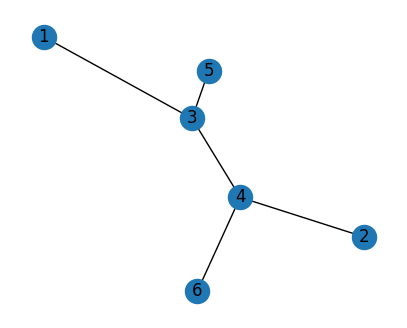

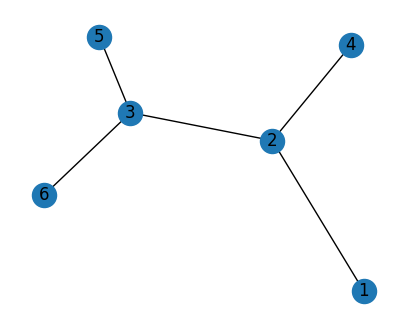

In [65]:
fig, ax = plt.subplots(figsize=(5,4))
Gw = nx.Graph()
# Nodos y vonexiones
Gw.add_weighted_edges_from(list_nx)

Gw.edges(data=True)
nx.draw(Gw, with_labels=True, ax=ax) 
nx.is_weighted(Gw)

fig, ax = plt.subplots(figsize=(5,4))
Gw2= nx.Graph()
# Nodos y vonexiones
Gw2.add_weighted_edges_from(list_nx2)


Gw2.edges(data=True)
layout = nx.spring_layout(Gw2)
nx.draw(Gw2, with_labels=True, ax=ax) 




{(2, 1): Text(0.09349033989966604, 0.1949275655412699, '9.60'),
 (2, 3): Text(0.055483464621077394, 0.21225430466259287, '13.98'),
 (2, 4): Text(-0.04543482978420316, 0.409499826909822, '17.88'),
 (3, 5): Text(0.09172510536414369, -0.5311629924370127, '69.04'),
 (3, 6): Text(-0.08429713458909202, 0.1389973347712321, '19.36')}

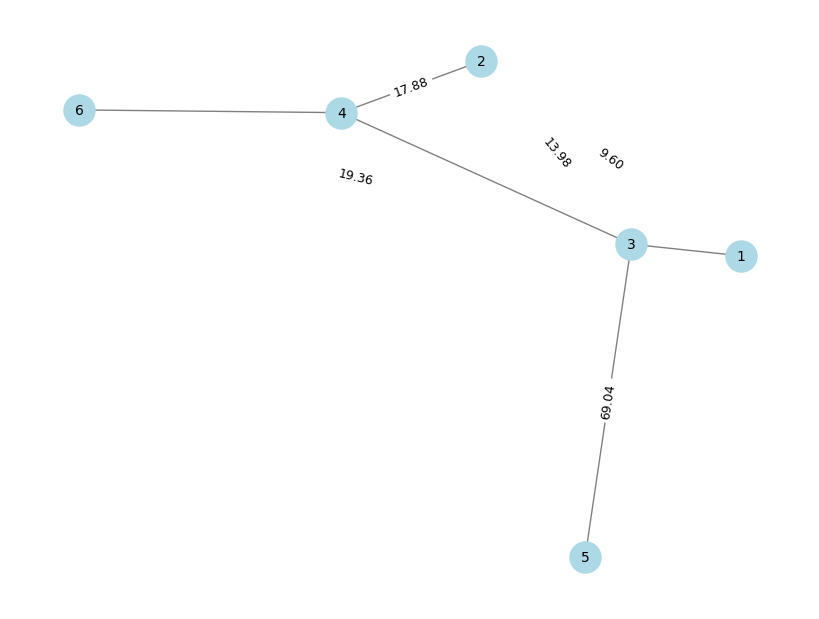

In [69]:
edge_weights = nx.get_edge_attributes(Gw, 'weight')

# Usar el layout Kamada-Kawai que respeta las distancias
pos = nx.kamada_kawai_layout(Gw, weight='weight')

# Dibujar el grafo
plt.figure(figsize=(8, 6))
nx.draw(Gw, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10)

# Agregar los pesos de los ejes como etiquetas
edge_labels = {(u, v): f"{w:.2f}" for u, v, w in list_nx2}
nx.draw_networkx_edge_labels(Gw, pos, edge_labels=edge_labels, font_size=9)

{(2, 1): Text(0.17147188985957418, 0.3634137340264356, '9.60'),
 (2, 3): Text(0.13469242664267655, 0.16639017443642778, '13.98'),
 (2, 4): Text(-0.04357701866940855, 0.3757267122576087, '17.88'),
 (3, 5): Text(-0.2813013941065674, -0.48249083782969715, '69.04'),
 (3, 6): Text(0.28810126421451043, -0.09026622237354998, '19.36')}

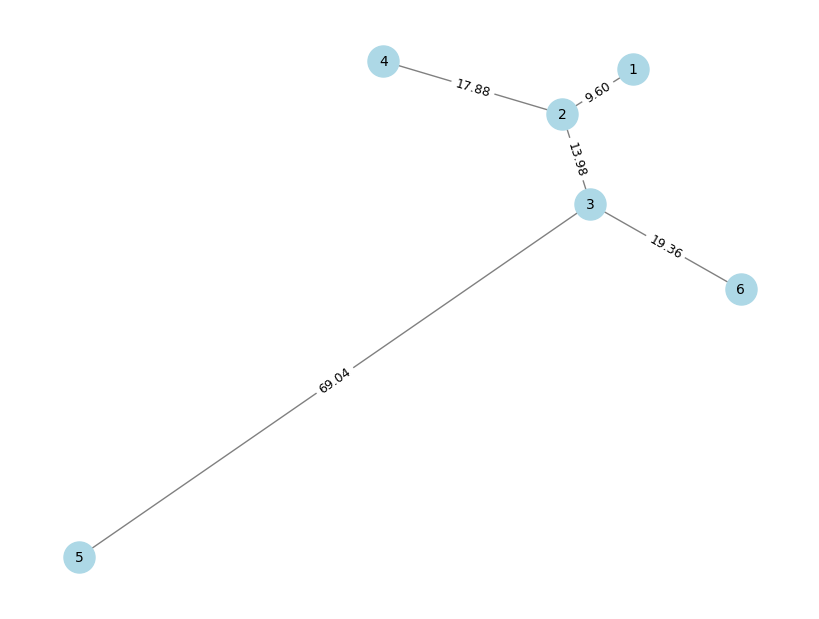

In [68]:
edge_weights = nx.get_edge_attributes(Gw2, 'weight')

# Usar el layout Kamada-Kawai que respeta las distancias
pos = nx.kamada_kawai_layout(Gw2, weight='weight')

# Dibujar el grafo
plt.figure(figsize=(8, 6))
nx.draw(Gw2, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10)

# Agregar los pesos de los ejes como etiquetas
edge_labels = {(u, v): f"{w:.2f}" for u, v, w in list_nx2}
nx.draw_networkx_edge_labels(Gw2, pos, edge_labels=edge_labels, font_size=9)

#1 are they isomorphic?


In [70]:
tf = nx.is_isomorphic(Gw, Gw2, node_match=None, edge_match=None)
print(tf)

True


In [71]:
matcher = nx.algorithms.isomorphism.GraphMatcher(Gw, Gw2)
if matcher.is_isomorphic():
    mapping = matcher.mapping  # Diccionario con la asignación de nodos
    print("Asignación de nodos:", mapping)
else:
    print("Los grafos no son isomorfos")

Asignación de nodos: {3: 2, 1: 1, 4: 3, 5: 4, 2: 5, 6: 6}


If they are isomorophic, extract the distance. For that we need to compare each possible combination of the adjancecy matrix with each possible combination of the other matrix (a lot of comparison, very time-consuming for bigger graphs) and calculate a distance between them, and keep the minimun. 

In [72]:
from scipy.optimize import linear_sum_assignment
from itertools import permutations

In [73]:
AM1= nx.adjacency_matrix(Gw,nodelist=[1,2,3,4,5,6]).toarray()
AM2= nx.adjacency_matrix(Gw2,nodelist=[1,2,3,4,5,6]).toarray()
print(AM1)
print(AM2)

[[ 0.          0.          5.28731726  0.          0.          0.        ]
 [ 0.          0.          0.         10.9791399   0.          0.        ]
 [ 5.28731726  0.          0.         25.86452931 56.41557158  0.        ]
 [ 0.         10.9791399  25.86452931  0.          0.         10.9791399 ]
 [ 0.          0.         56.41557158  0.          0.          0.        ]
 [ 0.          0.          0.         10.9791399   0.          0.        ]]
[[ 0.          9.59807215  0.          0.          0.          0.        ]
 [ 9.59807215  0.         13.97822918 17.88447869  0.          0.        ]
 [ 0.         13.97822918  0.          0.         69.04148032 19.36369591]
 [ 0.         17.88447869  0.          0.          0.          0.        ]
 [ 0.          0.         69.04148032  0.          0.          0.        ]
 [ 0.          0.         19.36369591  0.          0.          0.        ]]


In [74]:
n = len(AM1)
best_perm = None
min_cost = float('inf')

# Probar todas las permutaciones posibles de nodos
for perm in permutations(range(n)):  
    #print(perm)
    # Reordenar filas y columnas de A2 según la permutación
    AM2_permuted = AM2[np.ix_(perm, perm)]
    
    # Calcular la diferencia de pesos
    cost = np.sum(np.abs(AM1 - AM2_permuted))
    # Guardar la mejor permutación
    if cost < min_cost:
        min_cost = cost
        best_perm = perm
        
best_AM2 = AM2[np.ix_(best_perm, best_perm)]
# Imprimir la mejor asignación de nodos
print("Coste minimo", min_cost)
print(best_perm)
node_mapping = {i: best_perm[i] for i in range(n)}
print("Asignación óptima de nodos:", node_mapping)
print(AM1)
print(best_AM2)

Coste minimo 93.74998811881184
(5, 3, 2, 1, 4, 0)
Asignación óptima de nodos: {0: 5, 1: 3, 2: 2, 3: 1, 4: 4, 5: 0}
[[ 0.          0.          5.28731726  0.          0.          0.        ]
 [ 0.          0.          0.         10.9791399   0.          0.        ]
 [ 5.28731726  0.          0.         25.86452931 56.41557158  0.        ]
 [ 0.         10.9791399  25.86452931  0.          0.         10.9791399 ]
 [ 0.          0.         56.41557158  0.          0.          0.        ]
 [ 0.          0.          0.         10.9791399   0.          0.        ]]
[[ 0.          0.         19.36369591  0.          0.          0.        ]
 [ 0.          0.          0.         17.88447869  0.          0.        ]
 [19.36369591  0.          0.         13.97822918 69.04148032  0.        ]
 [ 0.         17.88447869 13.97822918  0.          0.          9.59807215]
 [ 0.          0.         69.04148032  0.          0.          0.        ]
 [ 0.          0.          0.          9.59807215  0.      

In [75]:

def graph_distance_matrix(graph):
    length = nx.all_pairs_dijkstra_path_length(graph)
    nodes = list(graph.nodes)
    n = len(nodes)
    dist_matrix = np.zeros((n, n))

    for i,j in length:
        for a in range(len(j.keys())):
            p = list(j.keys())
            col = p[a]
            val = list(j.values())
            dist_matrix[i-1,col-1] = val[a]

    return dist_matrix


A1 = graph_distance_matrix(Gw)
A2 = graph_distance_matrix(Gw2)
print(A1)
print(A2)

[[ 0.         42.13098648  5.28731726 31.15184658 61.70288884 42.13098648]
 [42.13098648  0.         36.84366922 10.9791399  93.2592408  21.95827981]
 [ 5.28731726 36.84366922  0.         25.86452931 56.41557158 36.84366922]
 [31.15184658 10.9791399  25.86452931  0.         82.2801009  10.9791399 ]
 [61.70288884 93.2592408  56.41557158 82.2801009   0.         93.2592408 ]
 [42.13098648 21.95827981 36.84366922 10.9791399  93.2592408   0.        ]]
[[  0.           9.59807215  23.57630133  27.48255084  92.61778165
   42.93999724]
 [  9.59807215   0.          13.97822918  17.88447869  83.01970951
   33.34192509]
 [ 23.57630133  13.97822918   0.          31.86270787  69.04148032
   19.36369591]
 [ 27.48255084  17.88447869  31.86270787   0.         100.9041882
   51.22640378]
 [ 92.61778165  83.01970951  69.04148032 100.9041882    0.
   88.40517623]
 [ 42.93999724  33.34192509  19.36369591  51.22640378  88.40517623
    0.        ]]


In [76]:

n = len(A1)
best_perm = None
min_cost = float('inf')

# Probar todas las permutaciones posibles de nodos
for perm in permutations(range(n)):  
    #print(perm)
    # Reordenar filas y columnas de A2 según la permutación
    A2_permuted = A2[np.ix_(perm, perm)]
    
    # Calcular la diferencia de pesos
    cost = np.sum(np.abs(A1 - A2_permuted))
    # Guardar la mejor permutación
    if cost < min_cost:
        min_cost = cost
        best_perm = perm
        
best_A2 = A2[np.ix_(best_perm, best_perm)]
# Imprimir la mejor asignación de nodos
print("Coste minimo", min_cost)
print(best_perm)
node_mapping = {i: best_perm[i] for i in range(n)}
print("Asignación óptima de nodos:", node_mapping)
print(A1)
print(best_A2)

Coste minimo 236.94080688393393
(5, 3, 2, 1, 4, 0)
Asignación óptima de nodos: {0: 5, 1: 3, 2: 2, 3: 1, 4: 4, 5: 0}
[[ 0.         42.13098648  5.28731726 31.15184658 61.70288884 42.13098648]
 [42.13098648  0.         36.84366922 10.9791399  93.2592408  21.95827981]
 [ 5.28731726 36.84366922  0.         25.86452931 56.41557158 36.84366922]
 [31.15184658 10.9791399  25.86452931  0.         82.2801009  10.9791399 ]
 [61.70288884 93.2592408  56.41557158 82.2801009   0.         93.2592408 ]
 [42.13098648 21.95827981 36.84366922 10.9791399  93.2592408   0.        ]]
[[  0.          51.22640378  19.36369591  33.34192509  88.40517623
   42.93999724]
 [ 51.22640378   0.          31.86270787  17.88447869 100.9041882
   27.48255084]
 [ 19.36369591  31.86270787   0.          13.97822918  69.04148032
   23.57630133]
 [ 33.34192509  17.88447869  13.97822918   0.          83.01970951
    9.59807215]
 [ 88.40517623 100.9041882   69.04148032  83.01970951   0.
   92.61778165]
 [ 42.93999724  27.48255084

With this we have the optimal node assignment - and have the distance between the two matrixes. This algortith is not time-optimal. It is goung to increase with bigger graphs. 
Now we will try to reconstruct a mean skeleton from the mean of the two distance matrixes.

In [77]:
suma = np.add(AM1,best_AM2)
mean = suma/2
print(mean)

[[ 0.          0.         12.32550659  0.          0.          0.        ]
 [ 0.          0.          0.         14.4318093   0.          0.        ]
 [12.32550659  0.          0.         19.92137925 62.72852595  0.        ]
 [ 0.         14.4318093  19.92137925  0.          0.         10.28860603]
 [ 0.          0.         62.72852595  0.          0.          0.        ]
 [ 0.          0.          0.         10.28860603  0.          0.        ]]


{(1, 3): 12.325506585962867, (2, 4): 14.431809297045364, (3, 4): 19.921379249344863, (3, 5): 62.72852595236215, (4, 6): 10.288606026109727}


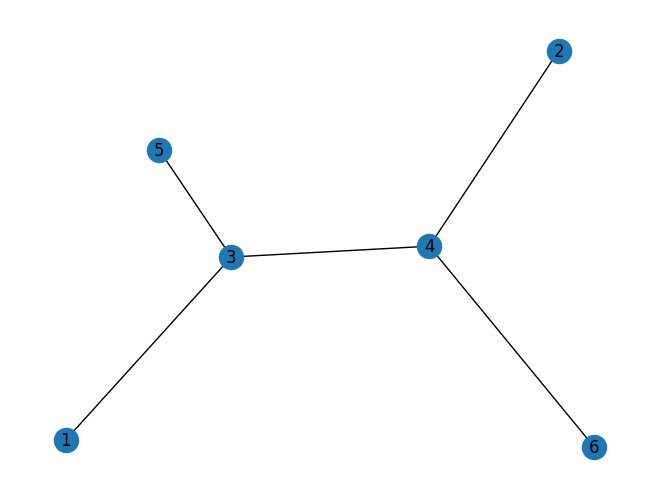

In [78]:
DG = nx.from_numpy_array(mean, create_using=nx.Graph,nodelist=[1,2,3,4,5,6])


DG.edges(data=True)
nx.draw(DG,with_labels=True) 
edge_weights = nx.get_edge_attributes(DG, 'weight')
print(edge_weights)

{(1, 3): Text(0.20900050686134664, 0.05974582548873908, '12.33'),
 (2, 4): Text(-0.18518284624686066, 0.36019884685924675, '14.43'),
 (3, 4): Text(-0.03222871313114156, 0.14927173828859286, '19.92'),
 (3, 5): Text(0.19371221080157874, -0.47048692833793293, '62.73'),
 (4, 6): Text(-0.24975961685375206, 0.19981031626760948, '10.29')}

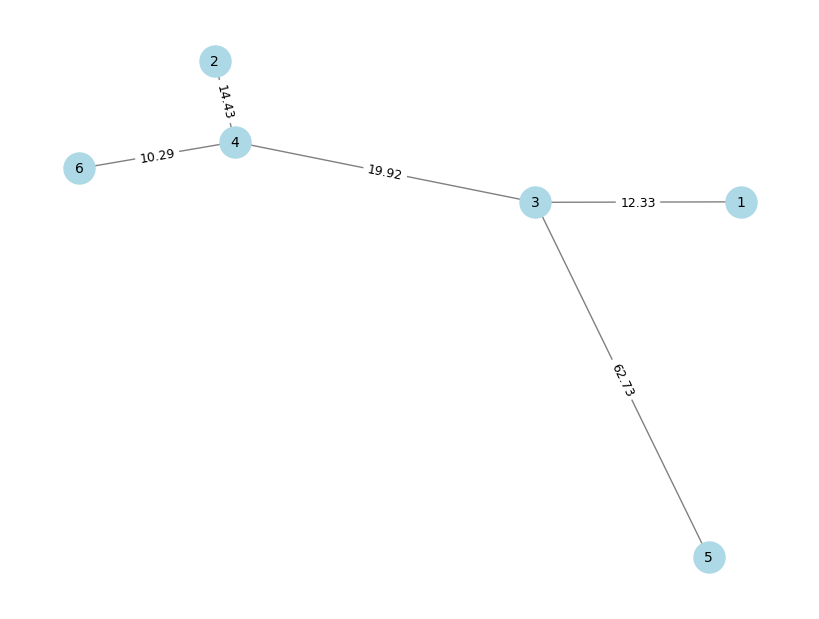

In [79]:
edge_weights = nx.get_edge_attributes(DG, 'weight')

# Usar el layout Kamada-Kawai que respeta las distancias
pos = nx.kamada_kawai_layout(DG, weight='weight')

# Dibujar el grafo
plt.figure(figsize=(8, 6))
nx.draw(DG, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10)

# Agregar los pesos de los ejes como etiquetas
edge_labels = {dupl: f"{w:.2f}" for dupl, w in edge_weights.items()}
#edge_labels = {edge: f"{weight:.2f}" for edge, weight in edge_weights.items()}
nx.draw_networkx_edge_labels(Gw2, pos, edge_labels=edge_labels, font_size=9)

In [ ]:


def graph_distance_matrix(graph):
    length = nx.all_pairs_dijkstra_path_length(graph)
    nodes = list(graph.nodes)
    n = len(nodes)
    dist_matrix = np.zeros((n, n))

    for i,j in length:
        for a in range(len(j.keys())):
            p = list(j.keys())
            col = p[a]
            val = list(j.values())
            dist_matrix[i-1,col-1] = val[a]

    return dist_matrix

def gromov_hausdorff_distance(G1, G2):
    """Calcula una aproximación a la distancia Gromov-Hausdorff entre dos grafos."""
    D1 = graph_distance_matrix(G1)
    print(D1)
    D2 = graph_distance_matrix(G2)
    print(D2)
    
    # Verificamos tamaños y ajustamos si es necesario
    if D1.shape != D2.shape:
        raise ValueError("Los grafos deben tener el mismo número de nodos para esta aproximación.")
    
     # Calcula la matriz de costos entre distancias
    n = D1.shape[0]
    cost_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            cost_matrix[i, j] = np.max(np.abs(D1 - D2[i, j]))
    
    # Encuentra la asignación óptima de nodos usando el algoritmo húngaro
    print(cost_matrix)
    row_ind, col_ind = linear_sum_assignment(cost_matrix)
    print(row_ind)
    print(col_ind)
    # Calcula la distancia GH usando la asignación óptima
    gh_distance = cost_matrix[row_ind, col_ind].max()
    
    # Calcula la matriz de costos entre distancias
    #cost_matrix = np.abs(D1[:, :, np.newaxis] - D2[np.newaxis, :, :]).max(axis=(1, 2))

    
    return gh_distance


distancia = gromov_hausdorff_distance(Gw, Gw2)
print(f"Distancia Gromov-Hausdorff: {distancia:.4f}")

[[0.         0.23506899 0.20458735 0.35176573 0.38510765 0.47822809]
 [0.23506899 0.         0.03048164 0.17766002 0.21100194 0.30412238]
 [0.20458735 0.03048164 0.         0.14717838 0.1805203  0.27364074]
 [0.35176573 0.17766002 0.14717838 0.         0.03334193 0.12646236]
 [0.38510765 0.21100194 0.1805203  0.03334193 0.         0.15980429]
 [0.47822809 0.30412238 0.27364074 0.12646236 0.15980429 0.        ]]
[[0.         0.2118397  0.10895364 0.11383645 0.32365363 0.14836315]
 [0.2118397  0.         0.10288606 0.09800325 0.30782042 0.14229557]
 [0.10895364 0.10288606 0.         0.00488281 0.21469999 0.03940951]
 [0.11383645 0.09800325 0.00488281 0.         0.20981717 0.04429232]
 [0.32365363 0.30782042 0.21469999 0.20981717 0.         0.25410949]
 [0.14836315 0.14229557 0.03940951 0.04429232 0.25410949 0.        ]]
[[0.47822809 0.26638839 0.36927445 0.36439164 0.32365363 0.32986494]
 [0.26638839 0.47822809 0.37534203 0.38022484 0.30782042 0.33593253]
 [0.36927445 0.37534203 0.478228

In [12]:
Gw.edge_attr_dict_factory

weights = [a[2]["weight"] for a in Gw.edges(data=True)]
print(weights)
print(Gw.edges[(3,1)])
print(Gw.edges)
for u,v in Gw.edges:
    print(Gw.edges[u,v]["weight"]) # Type 'numpy.float64'

[0.20458735169226888, 0.030481640117054405, 0.14717837794793714, 0.03334192509453792, 0.126462361593259]
{'weight': 0.20458735169226888}
[(3, 1), (3, 2), (3, 4), (4, 5), (4, 6)]
0.20458735169226888
0.030481640117054405
0.14717837794793714
0.03334192509453792
0.126462361593259


In [13]:
dist = nx.graph_edit_distance(Gw, Gw2, node_match=None, edge_match=None, node_subst_cost=None, node_del_cost=None, node_ins_cost=None, edge_subst_cost=None, edge_del_cost=None, edge_ins_cost=None, roots=None, upper_bound=None, timeout=None)
print(dist)

0.0


In [14]:
G1 = nx.Graph()
G1.add_edge(0, 1, weight=2)
G1.add_edge(1, 2, weight=3)

G2 = nx.Graph()
G2.add_edge(0, 1, weight=2)
G2.add_edge(1, 2, weight=5)
print(G2)

Graph with 3 nodes and 2 edges


In [15]:
#https://en.wikipedia.org/wiki/Gromov%E2%80%93Hausdorff_convergence
#extract distance matrix

length = nx.all_pairs_dijkstra_path_length(Gw)
nodes = list(Gw.nodes)
n = len(nodes)
dist_matrix = np.zeros((n, n))

for i,j in length:
    print(i)
    for a in range(len(j.keys())):
        print(a)
        
        print(j.keys())
        p = list(j.keys())
        col = p[a]
        print(j.values())
        val = list(j.values())
        print(val[a])
        dist_matrix[i-1,col-1] = val[a]
print(dist_matrix)


3
0
dict_keys([3, 2, 4, 5, 1, 6])
dict_values([0, 0.030481640117054405, 0.14717837794793714, 0.18052030304247507, 0.20458735169226888, 0.27364073954119617])
0
1
dict_keys([3, 2, 4, 5, 1, 6])
dict_values([0, 0.030481640117054405, 0.14717837794793714, 0.18052030304247507, 0.20458735169226888, 0.27364073954119617])
0.030481640117054405
2
dict_keys([3, 2, 4, 5, 1, 6])
dict_values([0, 0.030481640117054405, 0.14717837794793714, 0.18052030304247507, 0.20458735169226888, 0.27364073954119617])
0.14717837794793714
3
dict_keys([3, 2, 4, 5, 1, 6])
dict_values([0, 0.030481640117054405, 0.14717837794793714, 0.18052030304247507, 0.20458735169226888, 0.27364073954119617])
0.18052030304247507
4
dict_keys([3, 2, 4, 5, 1, 6])
dict_values([0, 0.030481640117054405, 0.14717837794793714, 0.18052030304247507, 0.20458735169226888, 0.27364073954119617])
0.20458735169226888
5
dict_keys([3, 2, 4, 5, 1, 6])
dict_values([0, 0.030481640117054405, 0.14717837794793714, 0.18052030304247507, 0.20458735169226888, 0.27364

A possible outline for the algortithm:
    - First compare G1 with G2...GN and see if they are isomorphic.
        -They ARE isomorphic -- then take the distance matrix, calculate the cost matrix, and optimize to obtain the node mapping.
            -We will have all the isomorphic skeletons with distance between them. We repesent this as a cloud of points (make distance matrix) AND one node mapping --> we can exact means!! 
        -The AREN'T isomorphic -- do nothing
    -Continue until all graphs are classified into isomorphinsm
The output will be N groups of isomorphic skeletons. Each group will have its own distance matrix, which we can use to classify INSIDE each group. In this way we can refine each group into classes if we see a clustering 
        

In [19]:

from scipy.optimize import linear_sum_assignment

def graph_distance_matrix(graph):
    length = nx.all_pairs_dijkstra_path_length(graph)
    nodes = list(graph.nodes)
    n = len(nodes)
    dist_matrix = np.zeros((n, n))

    for i,j in length:
        for a in range(len(j.keys())):
            p = list(j.keys())
            col = p[a]
            val = list(j.values())
            dist_matrix[i-1,col-1] = val[a]

    return dist_matrix

def gromov_hausdorff_distance(G1, G2):
    """Calcula una aproximación a la distancia Gromov-Hausdorff entre dos grafos."""
    D1 = graph_distance_matrix(G1)
    print(D1)
    D2 = graph_distance_matrix(G2)
    print(D2)
    
    # Verificamos tamaños y ajustamos si es necesario
    if D1.shape != D2.shape:
        raise ValueError("Los grafos deben tener el mismo número de nodos para esta aproximación.")
    
     # Calcula la matriz de costos entre distancias
    n = D1.shape[0]
    cost_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            cost_matrix[i, j] = np.max(np.abs(D1 - D2[i, j]))
    
    # Encuentra la asignación óptima de nodos usando el algoritmo húngaro
    print(cost_matrix)
    row_ind, col_ind = linear_sum_assignment(cost_matrix)
    print(row_ind)
    print(col_ind)
    # Calcula la distancia GH usando la asignación óptima
    gh_distance = cost_matrix[row_ind, col_ind].max()
    
    # Calcula la matriz de costos entre distancias
    #cost_matrix = np.abs(D1[:, :, np.newaxis] - D2[np.newaxis, :, :]).max(axis=(1, 2))

    
    return gh_distance


# Ejemplo de uso:
G1 = nx.Graph()
G1.add_weighted_edges_from([(0, 1, 1), (1, 2, 2), (2, 0, 2)])

G2 = nx.Graph()
G2.add_weighted_edges_from([(0, 1, 1), (1, 2, 1), (2, 0, 3)])

distancia = gromov_hausdorff_distance(Gw, Gw2)
print(f"Distancia Gromov-Hausdorff: {distancia:.4f}")

[[0.         0.23506899 0.20458735 0.35176573 0.38510765 0.47822809]
 [0.23506899 0.         0.03048164 0.17766002 0.21100194 0.30412238]
 [0.20458735 0.03048164 0.         0.14717838 0.1805203  0.27364074]
 [0.35176573 0.17766002 0.14717838 0.         0.03334193 0.12646236]
 [0.38510765 0.21100194 0.1805203  0.03334193 0.         0.15980429]
 [0.47822809 0.30412238 0.27364074 0.12646236 0.15980429 0.        ]]
[[0.         0.2118397  0.10895364 0.11383645 0.32365363 0.14836315]
 [0.2118397  0.         0.10288606 0.09800325 0.30782042 0.14229557]
 [0.10895364 0.10288606 0.         0.00488281 0.21469999 0.03940951]
 [0.11383645 0.09800325 0.00488281 0.         0.20981717 0.04429232]
 [0.32365363 0.30782042 0.21469999 0.20981717 0.         0.25410949]
 [0.14836315 0.14229557 0.03940951 0.04429232 0.25410949 0.        ]]
[[0.47822809 0.26638839 0.36927445 0.36439164 0.32365363 0.32986494]
 [0.26638839 0.47822809 0.37534203 0.38022484 0.30782042 0.33593253]
 [0.36927445 0.37534203 0.478228

In [19]:
def graph_distance_matrix(graph,size):
    length = nx.all_pairs_dijkstra_path_length(graph)
    nodes = list(graph.nodes)
    dist_matrix = np.full((size, size), np.inf)

    for i,j in length:
        for a in range(len(j.keys())):
            p = list(j.keys())
            col = p[a]
            val = list(j.values())
            dist_matrix[i-1,col-1] = val[a]

    return dist_matrix

def gromov_hausdorff_distance(G1, G2):
    """Calcula una aproximación a la distancia Gromov-Hausdorff entre dos grafos."""
    n1, n2 = len(G1), len(G2)
    max_size = max(n1, n2)
    D1 = graph_distance_matrix(G1,max_size)
    D2 = graph_distance_matrix(G2,max_size)
    
    # Verificamos tamaños y ajustamos si es necesario
    if D1.shape != D2.shape:
        raise ValueError("Los grafos deben tener el mismo número de nodos para esta aproximación.")
    
     # Calcula la matriz de costos entre distancias
    
    cost_matrix = np.zeros((max_size, max_size))
    for i in range(max_size):
        for j in range(max_size):
            if i < n1 and j < n2:
                cost_matrix[i, j] = np.max(np.abs(D1 - D2[i, j]))
            else:
                cost_matrix[i, j] = np.inf
    print(cost_matrix)
    # Encuentra la asignación óptima de nodos usando el algoritmo húngaro
    row_ind, col_ind = linear_sum_assignment(cost_matrix)
    
    # Calcula la distancia GH usando la asignación óptima
    gh_distance = cost_matrix[row_ind, col_ind].max()
    
    # Calcula la matriz de costos entre distancias
    #cost_matrix = np.abs(D1[:, :, np.newaxis] - D2[np.newaxis, :, :]).max(axis=(1, 2))

    
    return gh_distance


# Ejemplo de uso:
G1 = nx.Graph()
G1.add_weighted_edges_from([(0, 1, 1), (1, 2, 2), (2, 0, 2)])

G2 = nx.Graph()
G2.add_weighted_edges_from([(0, 1, 1), (1, 2, 1), (2, 0, 3)])

distancia = gromov_hausdorff_distance(Gw, G2)
print(f"Distancia Gromov-Hausdorff: {distancia:.4f}")

[[0.47822809 1.                inf        inf        inf        inf]
 [1.         0.47822809        inf        inf        inf        inf]
 [       inf        inf        inf        inf        inf        inf]
 [       inf        inf        inf        inf        inf        inf]
 [       inf        inf        inf        inf        inf        inf]
 [1.         2.                inf        inf        inf        inf]]


ValueError: cost matrix is infeasible

In [ ]:
def weighted_graph_edit_distance(G1, G2):
    """Calcula la distancia de edición entre dos grafos ponderados."""

    # Define la función de costos que considera los pesos de las aristas
    def edge_cost(G1,G2):
        # Obtiene los pesos, si no existen, se asumen como 1 (o 0, según el caso)
        weight1 = G1.edges[u,v]["weight"]
        weight2 = G2.edges[u1,v1]["weight"]
        # Costo basado en la diferencia de pesos
        return abs(weight1 - weight2)

    # Calcula la distancia de edición con la función de costos personalizada
    ged = nx.graph_edit_distance(G1, G2, edge_subst_cost=edge_cost(G1,G2))
    return ged
#That is, the functions will receive the edge attribute dictionaries as inputs. The functions are expected to return positive numeric values.
# Ejemplo de uso:

distancia = weighted_graph_edit_distance(G1, G2)
print(f"Graph Edit Distance: {distancia:.4f}")

AttributeError: 'Graph' object has no attribute 'get'

matrix([[0.        , 0.20458735, 0.03048164, 0.14717838, 0.        ,
         0.        ],
        [0.20458735, 0.        , 0.        , 0.        , 0.        ,
         0.        ],
        [0.03048164, 0.        , 0.        , 0.        , 0.        ,
         0.        ],
        [0.14717838, 0.        , 0.        , 0.        , 0.03334193,
         0.12646236],
        [0.        , 0.        , 0.        , 0.03334193, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , 0.12646236, 0.        ,
         0.        ]])

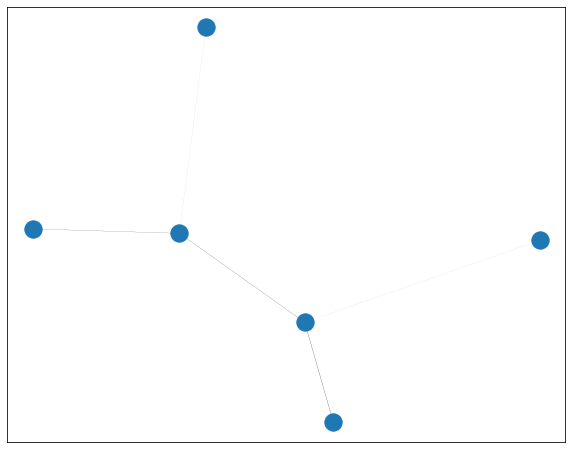

In [114]:
# Definir la posición de los nodos utilizando un layout
pos = nx.spring_layout(Gw)

# Representar nodos y ejes
fig, ax = plt.subplots(figsize=(10,8))
nx.draw_networkx_nodes(
    Gw,
    pos = pos,
    ax = ax
)
nx.draw_networkx_edges(
    Gw,
    pos = pos,
    edgelist = Gw.edges,
    width = weigths,
    ax = ax
);

adjM = nx.adjacency_matrix(Gw).todense()
adjM

   start  end   weigths
0      2    1  0.073936
1      2    3  0.165872
2      2    4  0.042270
3      4    5  0.055733
4      4    6  0.054896
5      3    7  0.130507
6      3    8  0.030482


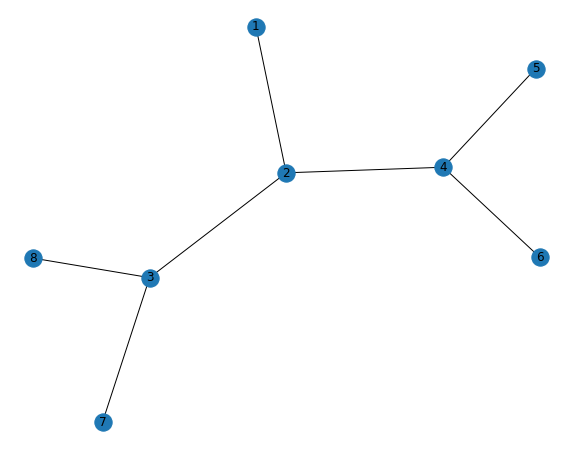

In [ ]:
conexiones = pd.DataFrame(
    {
        "start": lista_inicio,
        "end": lista_final,
        "weigths": weigths
    }
)
print(conexiones)
fig, ax = plt.subplots(figsize=(10,8))
G = nx.from_pandas_edgelist(conexiones, source="start", target="end", edge_attr = True, edge_key ="weigths")
nx.draw(G, with_labels=True, ax=ax) 


In [39]:
[a for a in G.edges(data=True)]

[(2, 1, {'weigths': 0.07393619973011537}),
 (2, 3, {'weigths': 0.16587186739891074}),
 (2, 4, {'weigths': 0.042269790783135246}),
 (3, 7, {'weigths': 0.1305074154006682}),
 (3, 8, {'weigths': 0.030481640117054405}),
 (4, 5, {'weigths': 0.05573345759677391}),
 (4, 6, {'weigths': 0.054895699522994994})]

#https://mathoverflow.net/questions/38305/similarity-of-weighted-graphs/38316#38316

In [112]:
from scipy.optimize import linear_sum_assignment

def graph_distance_matrix(graph):
    """Calcula la matriz de distancias más cortas entre todos los pares de nodos."""
    length = nx.all_pairs_dijkstra_path_length(graph)
    nodes = list(graph.nodes)
    n = len(nodes)
    dist_matrix = np.zeros((n, n))
    
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            dist_matrix[i, j] = length[u].get(v, np.inf)  # np.inf si no hay camino
    
    return dist_matrix

def gromov_hausdorff_distance(G1, G2):
    """Calcula una aproximación a la distancia Gromov-Hausdorff entre dos grafos."""
    D1 = graph_distance_matrix(G1)
    D2 = graph_distance_matrix(G2)
    
    # Verificamos tamaños y ajustamos si es necesario
    if D1.shape != D2.shape:
        raise ValueError("Los grafos deben tener el mismo número de nodos para esta aproximación.")
    
    # Calcula la matriz de costos entre distancias
    cost_matrix = np.abs(D1[:, :, np.newaxis] - D2[np.newaxis, :, :]).max(axis=(1, 2))
    
    # Optimización para encontrar la mejor asignación entre nodos
    row_ind, col_ind = linear_sum_assignment(cost_matrix)
    
    # Calcula la distancia GH usando la asignación óptima
    gh_distance = cost_matrix[row_ind, col_ind].max()
    
    return gh_distance

# Ejemplo de uso:
G1 = nx.Graph()
G1.add_weighted_edges_from([(0, 1, 1), (1, 2, 2), (2, 0, 2)])

G2 = nx.Graph()
G2.add_weighted_edges_from([(0, 1, 1), (1, 2, 1), (2, 0, 3)])

distancia = gromov_hausdorff_distance(G1, G2)
print(f"Distancia Gromov-Hausdorff: {distancia:.4f}")

TypeError: 'generator' object is not subscriptable